# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Taufiq Qurohman Ruki
- Email: taufiqqurohman98@gmail.com
- Id Dicoding: limitmax

## Persiapan

### Menyiapkan library yang dibutuhkan

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc


pd.set_option('display.max_columns', None)

### Menyiapkan data yang akan diguankan

## Data Understanding

In [25]:
df = pd.read_csv('data.csv', sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [26]:
print("Jumlah baris & kolom:", df.shape)

Jumlah baris & kolom: (4424, 37)


In [27]:
print("Data terdapat missing value:", df.isnull().values.any())

Data terdapat missing value: False


In [28]:
print("Data terdapat duplikat:", df.duplicated().any())

Data terdapat duplikat: False


In [29]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [30]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [31]:
df['Status'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [32]:
# Buat list untuk menyimpan informasi nilai unik
unique_info = []

# Iterasi setiap kolom dalam dataframe
for col in df.columns:
    unique_vals = df[col].unique()
    unique_info.append({
        'Kolom': col,
        'Jumlah Nilai Unik': len(unique_vals),
        'Nilai Unik': unique_vals
    })

# Buat dataframe dari hasil tersebut
unique_df = pd.DataFrame(unique_info)

# Tampilkan dataframe
unique_df

,Kolom,Jumlah Nilai Unik,Nilai Unik
0,Marital_status,6,"[1, 2, 4, 3, 5, 6]"
1,Application_mode,18,"[17, 15, 1, 39, 18, 53, 44, 51, 43, 7, 42, 16,..."
2,Application_order,8,"[5, 1, 2, 4, 3, 6, 9, 0]"
3,Course,17,"[171, 9254, 9070, 9773, 8014, 9991, 9500, 9238..."
4,Daytime_evening_attendance,2,"[1, 0]"
5,Previous_qualification,17,"[1, 19, 42, 39, 10, 3, 40, 2, 4, 12, 43, 15, 6..."
6,Previous_qualification_grade,101,"[122.0, 160.0, 100.0, 133.1, 142.0, 119.0, 137..."
7,Nacionality,21,"[1, 62, 6, 41, 26, 103, 13, 25, 21, 101, 11, 2..."
8,Mothers_qualification,29,"[19, 1, 37, 38, 3, 4, 42, 2, 34, 12, 40, 9, 5,..."
9,Fathers_qualification,34,"[12, 3, 37, 38, 1, 19, 5, 4, 34, 2, 39, 11, 9,..."


## Data Preparation

In [33]:
#data for EDA
eda = df.copy()
eda.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [34]:

# Mapping biner: 1 – yes / male, 0 – no / female
binary_map = {
    1: "Yes",
    0: "No"
}

gender_map = {
    1: "Male",
    0: "Female"
}


# Daytime or evening attendance
attendance_mapping = {
    1: 'Daytime',
    0: 'Evening'
}

# mapping untuk kolom 'marital'
marital_mapping = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto Union',
    6: 'Legally Separated'
}

# Mapping untuk kolom 'Application mode'
application_mode_mapping = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

# Mapping untuk kolom 'Course'
course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}


# Previous qualification
previous_qualification_mapping = {
    1: "Secondary education",
    2: "Higher education - bachelor's degree",
    3: "Higher education - degree",
    4: "Higher education - master's",
    5: "Higher education - doctorate",
    6: "Frequency of higher education",
    9: "12th year of schooling - not completed",
    10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling",
    14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical course",
    43: "Higher education - master (2nd cycle)"
}

# Nationality
nationality_mapping = {
    1: "Portuguese", 2: "German", 6: "Spanish", 11: "Italian", 13: "Dutch", 14: "English",
    17: "Lithuanian", 21: "Angolan", 22: "Cape Verdean", 24: "Guinean", 25: "Mozambican",
    26: "Santomean", 32: "Turkish", 41: "Brazilian", 62: "Romanian", 100: "Moldova (Republic of)",
    101: "Mexican", 103: "Ukrainian", 105: "Russian", 108: "Cuban", 109: "Colombian"
}

# Mother's occupation
mother_occupation_mapping = {
    0: "Student", 1: "Legislative/Executive/Directors", 2: "Intellectual/Scientific",
    3: "Technicians", 4: "Administrative staff", 5: "Services/Security/Sellers",
    6: "Farmers/Fishers", 7: "Industry/Construction", 8: "Machine Operators",
    9: "Unskilled Workers", 10: "Armed Forces", 90: "Other", 99: "(blank)",
    122: "Health professionals", 123: "Teachers", 125: "ICT specialists",
    131: "Intermediate science/engineering technicians", 132: "Intermediate health professionals",
    134: "Legal/social/cultural technicians", 141: "Secretaries/data processing",
    143: "Accounting/financial/registry operators", 144: "Other admin support",
    151: "Personal service workers", 152: "Sellers", 153: "Personal care workers",
    171: "Construction workers", 173: "Jewelers/artisans/etc.", 175: "Food/clothing/woodworking",
    191: "Cleaning workers", 192: "Unskilled agri/fish/forestry", 193: "Unskilled extractive/construction/etc.",
    194: "Meal prep assistants"
}

# Father's occupation
father_occupation_mapping = {
    0: "Student", 1: "Legislative/Executive/Directors", 2: "Intellectual/Scientific",
    3: "Technicians", 4: "Administrative staff", 5: "Services/Security/Sellers",
    6: "Farmers/Fishers", 7: "Industry/Construction", 8: "Machine Operators",
    9: "Unskilled Workers", 10: "Armed Forces", 90: "Other", 99: "(blank)",
    101: "Armed Forces Officers", 102: "Armed Forces Sergeants", 103: "Other Armed Forces personnel",
    112: "Admin/Commercial Directors", 114: "Hotel/Catering Directors", 121: "Science/Engineering Specialists",
    122: "Health professionals", 123: "Teachers", 124: "Finance/Admin Specialists",
    131: "Intermediate science/engineering technicians", 132: "Intermediate health professionals",
    134: "Legal/social/cultural technicians", 135: "ICT technicians", 141: "Secretaries/data processing",
    143: "Accounting/financial/registry operators", 144: "Other admin support",
    151: "Personal service workers", 152: "Sellers", 153: "Personal care workers",
    154: "Protection/security personnel", 161: "Skilled agricultural producers",
    163: "Subsistence farmers/fishers", 171: "Skilled construction workers",
    172: "Metalworkers", 174: "Electricians", 175: "Food/clothing/woodworking",
    181: "Fixed plant operators", 182: "Assembly workers", 183: "Drivers and mobile equipment operators",
    192: "Unskilled agri/fish/forestry", 193: "Unskilled extractive/construction/etc.",
    194: "Meal prep assistants", 195: "Street vendors"
}

# Mapping Mother's Qualification
mother_qualification_map = {
    1: "12th Yr Schooling or Eq.",
    2: "Bachelor's Degree",
    3: "Degree",
    4: "Master's",
    5: "Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Yr Not Completed",
    10: "11th Yr Not Completed",
    11: "7th Yr (Old)",
    12: "Other - 11th Yr",
    14: "10th Yr",
    18: "General Commerce",
    19: "Basic Ed 3rd Cycle",
    22: "Technical-Professional",
    26: "7th Yr",
    27: "2nd Cycle HS",
    29: "9th Yr Not Completed",
    30: "8th Yr",
    34: "Unknown",
    35: "Can't Read/Write",
    36: "Can Read Only",
    37: "Basic Ed 1st Cycle",
    38: "Basic Ed 2nd Cycle",
    39: "Tech Specialization",
    40: "Degree (1st Cycle)",
    41: "Specialized Studies",
    42: "Prof. Higher Technical",
    43: "Master (2nd Cycle)",
    44: "Doctorate (3rd Cycle)"
}

# Mapping Father's Qualification
father_qualification_map = {
    1: "12th Yr Schooling or Eq.",
    2: "Bachelor's Degree",
    3: "Degree",
    4: "Master's",
    5: "Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Yr Not Completed",
    10: "11th Yr Not Completed",
    11: "7th Yr (Old)",
    12: "Other - 11th Yr",
    13: "2nd Yr Complementary HS",
    14: "10th Yr",
    18: "General Commerce",
    19: "Basic Ed 3rd Cycle",
    20: "Complementary HS Course",
    22: "Technical-Professional",
    25: "Complementary Not Completed",
    26: "7th Yr",
    27: "2nd Cycle HS",
    29: "9th Yr Not Completed",
    30: "8th Yr",
    31: "Admin & Commerce",
    33: "Supp. Accounting/Admin",
    34: "Unknown",
    35: "Can't Read/Write",
    36: "Can Read Only",
    37: "Basic Ed 1st Cycle",
    38: "Basic Ed 2nd Cycle",
    39: "Tech Specialization",
    40: "Degree (1st Cycle)",
    41: "Specialized Studies",
    42: "Prof. Higher Technical",
    43: "Master (2nd Cycle)",
    44: "Doctorate (3rd Cycle)"
}

In [35]:
# pakai mapping untuk kolom-kolom yang sudah dibuat
eda['Marital_status'] = eda['Marital_status'].map(marital_mapping)
eda['Application_mode'] = eda['Application_mode'].map(application_mode_mapping)
eda['Course'] = eda['Course'].map(course_mapping)
eda['Daytime_evening_attendance'] = eda['Daytime_evening_attendance'].map(attendance_mapping)
eda['Previous_qualification'] = eda['Previous_qualification'].map(previous_qualification_mapping)
eda['Mothers_occupation'] = eda['Mothers_occupation'].map(mother_occupation_mapping)
eda['Fathers_occupation'] = eda['Fathers_occupation'].map(father_occupation_mapping)
eda['Mothers_qualification'] = eda['Mothers_qualification'].map(mother_qualification_map)
eda['Fathers_qualification'] = eda['Fathers_qualification'].map(father_qualification_map)
eda['Displaced'] = eda['Displaced'].map(binary_map)
eda['Educational_special_needs'] = eda['Educational_special_needs'].map(binary_map)
eda['Debtor'] = eda['Debtor'].map(binary_map)
eda['Tuition_fees_up_to_date'] = eda['Tuition_fees_up_to_date'].map(binary_map)
eda['Gender'] = eda['Gender'].map(gender_map)
eda['Scholarship_holder'] = eda['Scholarship_holder'].map(binary_map)
eda['International'] = eda['International'].map(binary_map)
eda['Nacionality'] = eda['Nacionality'].map(nationality_mapping)

In [36]:
eda.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd phase - general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Ed 3rd Cycle,Other - 11th Yr,Services/Security/Sellers,Unskilled Workers,127.3,Yes,No,No,Yes,Male,No,20,No,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,160.0,Portuguese,12th Yr Schooling or Eq.,Degree,Technicians,Technicians,142.5,Yes,No,No,No,Male,No,19,No,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase - general contingent,5,Communication Design,Daytime,Secondary education,122.0,Portuguese,Basic Ed 1st Cycle,Basic Ed 1st Cycle,Unskilled Workers,Unskilled Workers,124.8,Yes,No,No,No,Male,No,19,No,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase - general contingent,2,Journalism and Communication,Daytime,Secondary education,122.0,Portuguese,Basic Ed 2nd Cycle,Basic Ed 1st Cycle,Services/Security/Sellers,Technicians,119.6,Yes,No,No,Yes,Female,No,20,No,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,100.0,Portuguese,Basic Ed 1st Cycle,Basic Ed 2nd Cycle,Unskilled Workers,Unskilled Workers,141.5,No,No,No,Yes,Female,No,45,No,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Exploratory Data Analyst

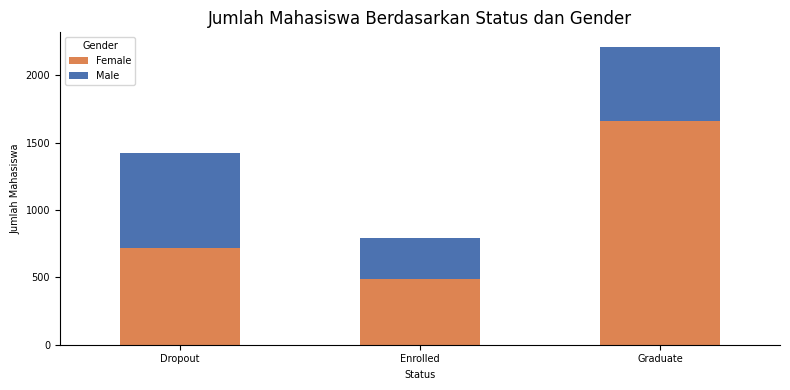

In [37]:
#1. Informasi jumlah mahasiswa keluar berdasarkan gender
status_gender_counts = eda.groupby(['Status', 'Gender']).size().unstack()

# Warna kustom: ganti sesuai preferensi
custom_colors = {
    'Male': '#4C72B0',     # Biru
    'Female': '#DD8452',   # Oranye
    # tambahkan warna lain jika ada gender tambahan
}

# Ambil warna berdasarkan kolom gender di dataframe
colors = [custom_colors.get(gender, '#999999') for gender in status_gender_counts.columns]

# Plot
ax = status_gender_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 4),
    color=colors
)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Format chart
plt.title('Jumlah Mahasiswa Berdasarkan Status dan Gender', fontsize=12)
plt.xlabel('Status', fontsize=7)
plt.ylabel('Jumlah Mahasiswa', fontsize=7)
plt.xticks(rotation=0, fontsize=7)
plt.yticks(fontsize=7)
plt.legend(title='Gender', fontsize=7, title_fontsize=7)
plt.grid(False)
plt.tight_layout()
plt.show()


/tmp/ipykernel_9995/1115011858.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_status_counts = eda.groupby(['Age Group', 'Status']).size().unstack(fill_value=0)


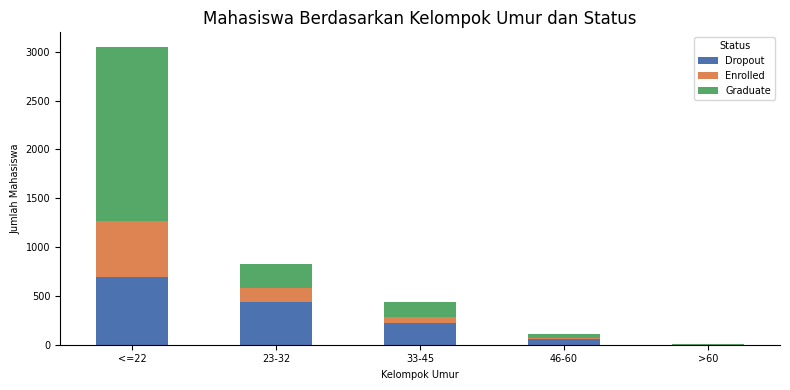

In [38]:
# 2. informasi umur siswa berdasarkan status
bins = [0, 22, 32, 45, 60, 100]
labels = ['<=22', '23-32', '33-45', '46-60', '>60']


# Pastikan kolom 'Age' ada di DataFrame
eda['Age Group'] = pd.cut(eda['Age_at_enrollment'], bins=bins, labels=labels, right=True)

# Hitung jumlah berdasarkan Age Group dan Status
age_status_counts = eda.groupby(['Age Group', 'Status']).size().unstack(fill_value=0)

# Warna custom (bisa diubah)
colors = ['#4C72B0', '#DD8452', '#55A868', '#C44E52']  # Tambah sesuai jumlah status

# Plot
ax = age_status_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 4),
    color=colors
)

# Hilangkan garis kotak
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Format chart
plt.title('Mahasiswa Berdasarkan Kelompok Umur dan Status', fontsize=12)
plt.xlabel('Kelompok Umur', fontsize=7)
plt.ylabel('Jumlah Mahasiswa', fontsize=7)
plt.xticks(rotation=0, fontsize=7)
plt.yticks(fontsize=7)
plt.legend(title='Status', fontsize=7, title_fontsize=7)
plt.tight_layout()
plt.show()


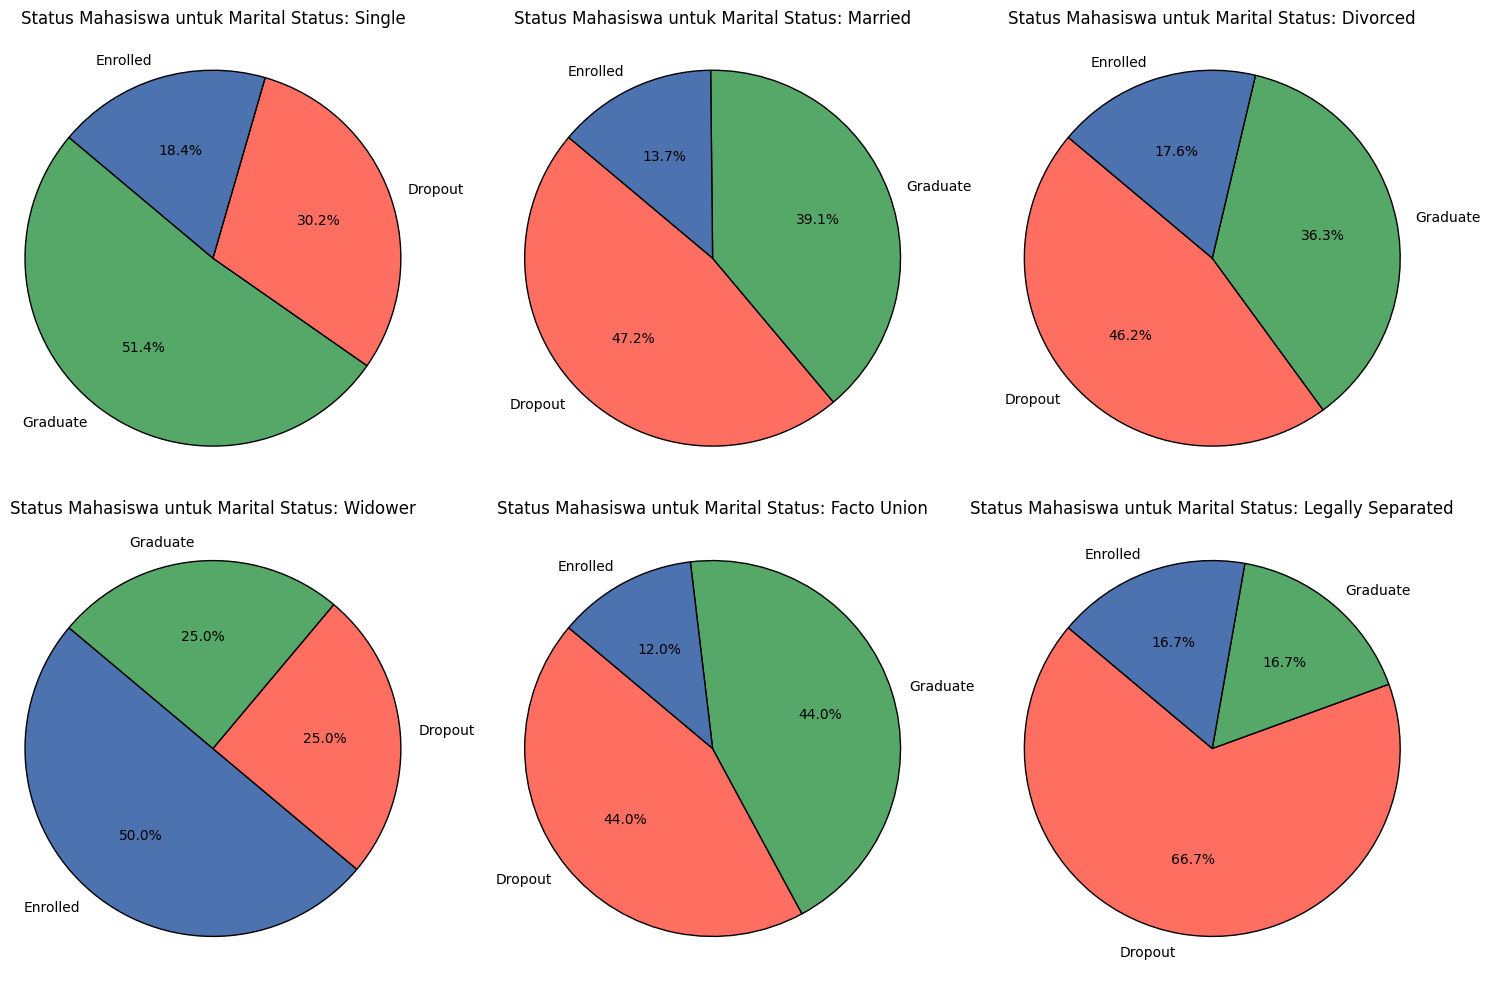

In [39]:
# 3. Informasi jumlah mahasiswa berdasarkan status dan marital

custom_colors = {
    'Dropout': '#FF6F61',   # warna contoh untuk status
    'Enrolled': '#4C72B0',
    'Graduate': '#55A868',
}

marital_status_list = eda['Marital_status'].unique()

plt.figure(figsize=(15, 10))  # ukuran besar untuk 6 chart

for i, marital_status in enumerate(marital_status_list, 1):
    plt.subplot(2, 3, i)
    
    # Filter data untuk marital_status tertentu
    subset = eda[eda['Marital_status'] == marital_status]
    
    # Hitung jumlah mahasiswa berdasarkan Status di subset itu
    status_counts = subset['Status'].value_counts()
    
    # Ambil warna berdasarkan status
    colors = [custom_colors.get(s, '#999999') for s in status_counts.index]
    
    plt.pie(
        status_counts,
        labels=status_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title(f'Status Mahasiswa untuk Marital Status: {marital_status}')
    plt.axis('equal')

plt.tight_layout()
plt.show()


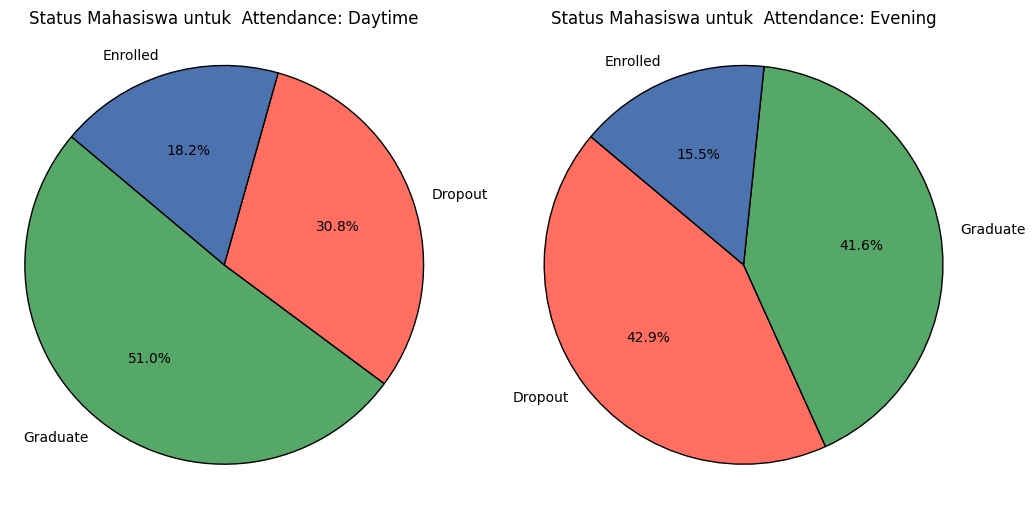

In [40]:
# 3. Informasi jumlah mahasiswa berdasarkan status dan Daytime_evening_attendance
custom_colors = {
    'Dropout': '#FF6F61',   # warna contoh untuk status
    'Enrolled': '#4C72B0',
    'Graduate': '#55A868',
}

daytime_evening_attendance_list = eda['Daytime_evening_attendance'].unique()

plt.figure(figsize=(15, 10))  # ukuran besar untuk 6 chart

for i, daytime_evening_attendance in enumerate(daytime_evening_attendance_list, 1):
    plt.subplot(2, 3, i)

    # Filter data untuk daytime_evening_attendance tertentu
    subset = eda[eda['Daytime_evening_attendance'] == daytime_evening_attendance]

    # Hitung jumlah mahasiswa berdasarkan Status di subset itu
    status_counts = subset['Status'].value_counts()
    
    # Ambil warna berdasarkan status
    colors = [custom_colors.get(s, '#999999') for s in status_counts.index]
    
    plt.pie(
        status_counts,
        labels=status_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title(f'Status Mahasiswa untuk  Attendance: {daytime_evening_attendance}')
    plt.axis('equal')

plt.tight_layout()
plt.show()


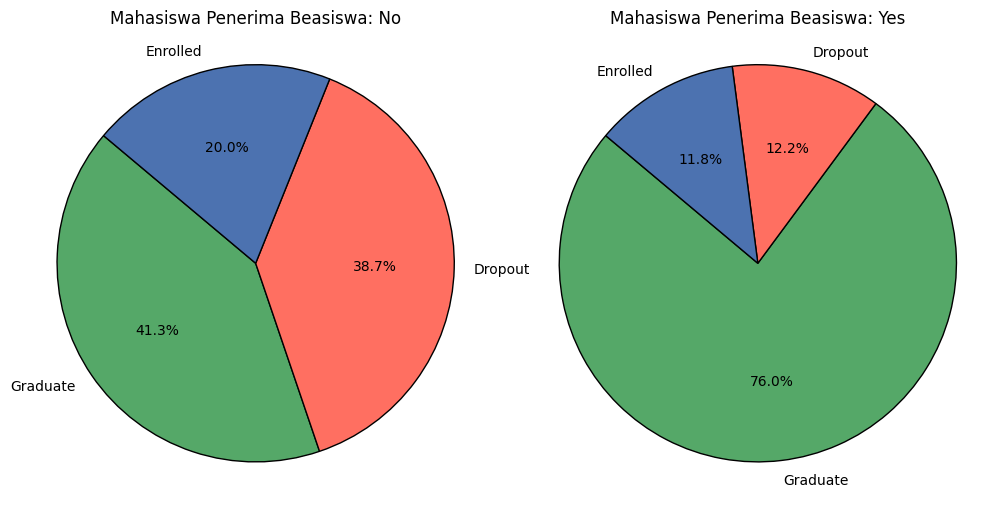

In [41]:
# 4. Informasi Scholarship_holder dan Status
custom_colors = {
    'Dropout': '#FF6F61',   # warna contoh untuk status
    'Enrolled': '#4C72B0',
    'Graduate': '#55A868',
}

scholarship_holder_list = eda['Scholarship_holder'].unique()
plt.figure(figsize=(15, 10))  # ukuran besar untuk 6 chart

for i, scholarship_holder in enumerate(scholarship_holder_list, 1):
    plt.subplot(2, 3, i)

    # Filter data untuk scholarship_holder tertentu
    subset = eda[eda['Scholarship_holder'] == scholarship_holder]

    # Hitung jumlah mahasiswa berdasarkan Status di subset itu
    status_counts = subset['Status'].value_counts()
    
    # Ambil warna berdasarkan status
    colors = [custom_colors.get(s, '#999999') for s in status_counts.index]
    
    plt.pie(
        status_counts,
        labels=status_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title(f'Mahasiswa Penerima Beasiswa: {scholarship_holder}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

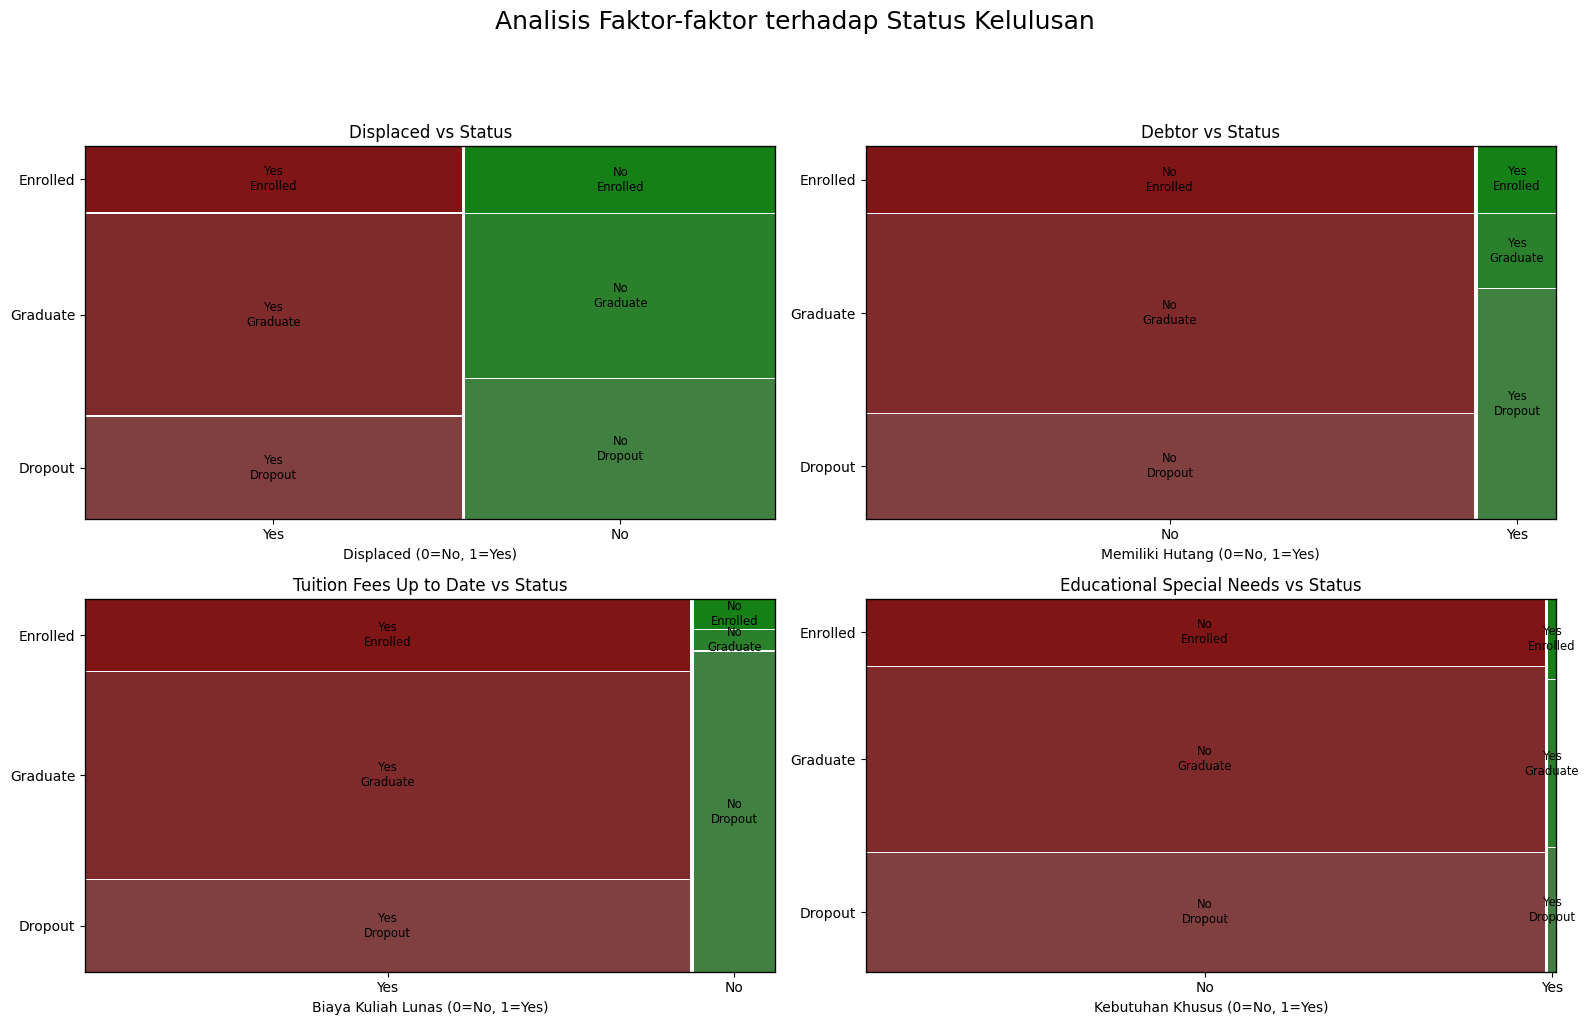

In [42]:
# 5. Informasi Faktor-faktor terhadap Status Kelulusan
custom_colors = {
    ('0',): {'color': '#d62828'},  # Merah untuk Status 0
    ('1',): {'color': '#07f49e'}   # Hijau untuk Status 1
}

# Fungsi pembantu untuk mengatur warna berdasarkan nilai Status
def props(key):
    return custom_colors.get((str(key[1]),), {})

# Plot 2 baris 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Analisis Faktor-faktor terhadap Status Kelulusan', fontsize=18, y=1.02)
axes = axes.flatten()  # ubah jadi list satu dimensi

# Buat 4 mosaic plot
mosaic(eda, ['Displaced', 'Status'], ax=axes[0], title='Displaced vs Status', properties=props)
axes[0].set_xlabel("Displaced (0=No, 1=Yes)")

mosaic(eda, ['Debtor', 'Status'], ax=axes[1], title='Debtor vs Status', properties=props)
axes[1].set_xlabel("Memiliki Hutang (0=No, 1=Yes)")

mosaic(eda, ['Tuition_fees_up_to_date', 'Status'], ax=axes[2], title='Tuition Fees Up to Date vs Status', properties=props)
axes[2].set_xlabel("Biaya Kuliah Lunas (0=No, 1=Yes)")

mosaic(eda, ['Educational_special_needs', 'Status'], ax=axes[3], title='Educational Special Needs vs Status', properties=props)
axes[3].set_xlabel("Kebutuhan Khusus (0=No, 1=Yes)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


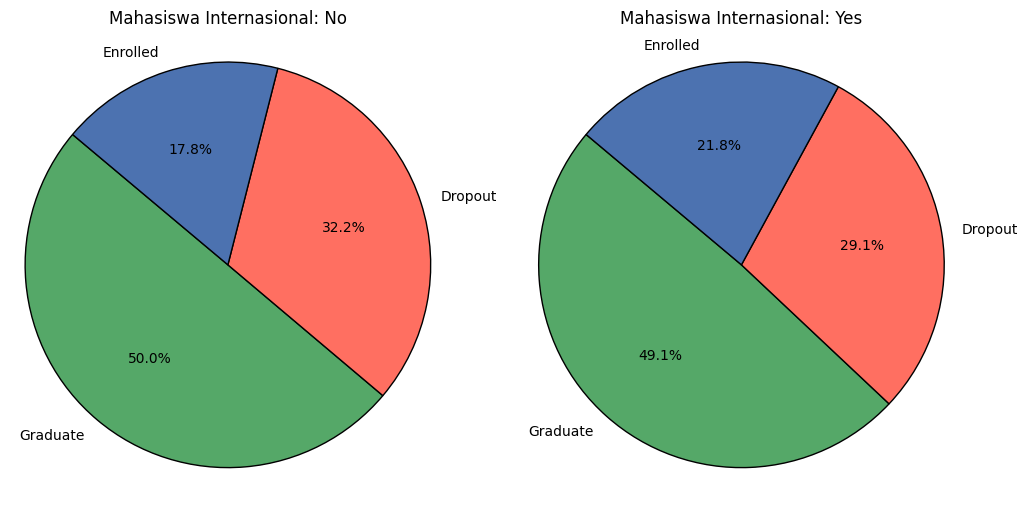

In [43]:
# # informasi persentase mahasiswa keluar berdasarkan kelas International
custom_colors = {
    'Dropout': '#FF6F61',   # warna contoh untuk status
    'Enrolled': '#4C72B0',
    'Graduate': '#55A868',
}

international_student_list = eda['International'].unique()
plt.figure(figsize=(15, 10))  # ukuran besar untuk 6 chart

for i, international_student in enumerate(international_student_list, 1):
    plt.subplot(2, 3, i)

    # Filter data untuk international_student tertentu
    subset = eda[eda['International'] == international_student]

    # Hitung jumlah mahasiswa berdasarkan Status di subset itu
    status_counts = subset['Status'].value_counts()
    
    # Ambil warna berdasarkan status
    colors = [custom_colors.get(s, '#999999') for s in status_counts.index]
    
    plt.pie(
        status_counts,
        labels=status_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title(f'Mahasiswa Internasional: {international_student}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

In [44]:
# Rata-rata Admision Grade siswa yang statusnya droupout
dropout_avg_grade = eda[eda['Status'] == 'Dropout']['Admission_grade'].mean()
print(f"Rata-rata Admission Grade untuk mahasiswa yang Dropout: {dropout_avg_grade:.2f}")

Rata-rata Admission Grade untuk mahasiswa yang Dropout: 124.96


## Preprocessing

In [45]:
# hapus beberapa kolom yang tidak relevan
df.drop(columns=['Application_order','Nacionality', 'Mothers_qualification',
       'Fathers_qualification','Unemployment_rate',
       'Inflation_rate', 'GDP',], inplace=True)

df.head()

,Marital_status,Application_mode,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,171,1,1,122.0,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,Dropout
1,1,15,9254,1,1,160.0,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,Graduate
2,1,1,9070,1,1,122.0,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,Dropout
3,1,17,9773,1,1,122.0,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,Graduate
4,2,39,8014,0,1,100.0,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,Graduate


In [46]:
# pisah data yang statusnya Enrolled dan yang lainnya
df_aktif = df[df['Status'] == 'Enrolled']
df_not_aktif = df[df['Status'] != 'Enrolled']

In [47]:
df_not_aktif['Status'].unique()

array(['Dropout', 'Graduate'], dtype=object)

In [48]:
df_not_aktif.shape

(3630, 30)

In [49]:
# split train dan test 80:20
X = df_not_aktif.drop(columns=['Status'])
y = df_not_aktif['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
print("Jumlah train:", X_train.shape[0])
print("Jumlah test:", X_test.shape[0])
print("=="*20)
print("Distribusi kelas train:\n", y_train.value_counts())
print("Distribusi kelas test:\n", y_test.value_counts())

Jumlah train: 2904
Jumlah test: 726
Distribusi kelas train:
 Status
Graduate    1767
Dropout     1137
Name: count, dtype: int64
Distribusi kelas test:
 Status
Graduate    442
Dropout     284
Name: count, dtype: int64


## Modeling

In [51]:
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(
        class_weight='balanced',
        random_state=42,
        n_jobs=-1 
    ))
])

In [52]:
# pakai pipeline untuk fit model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                        random_state=42))])

In [53]:
# prediksi pada data test
y_pred = pipeline.predict(X_test)

## Evaluation

In [54]:
# cek classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Dropout       0.94      0.82      0.88       284
    Graduate       0.90      0.97      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726



In [55]:
# cek confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[234  50]
 [ 14 428]]


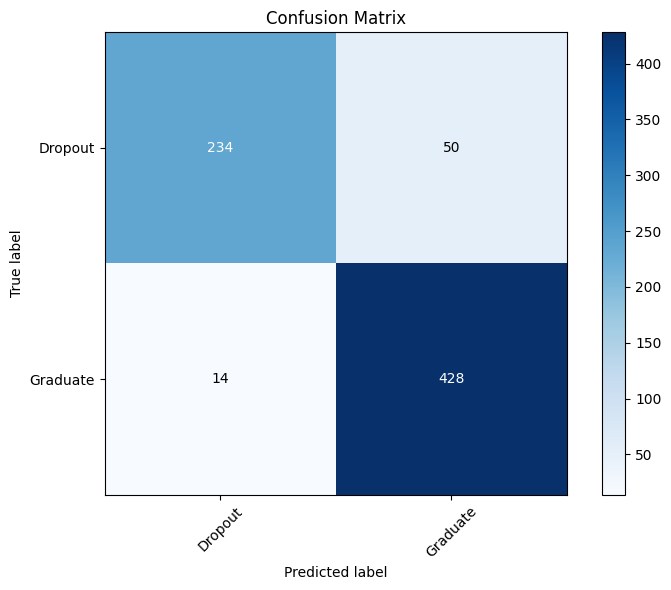

In [56]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))

# Tambahkan angka ke dalam setiap sel
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha='center', va='center',
                 color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [57]:
# # save model
# import joblib

# joblib.dump(pipeline, 'model/model_rf.pkl')

In [60]:
eda['Curricular_units_1st_sem_grade'].unique()

array([ 0.        , 14.        , 13.42857143, 12.33333333, 11.85714286,
       13.3       , 13.875     , 11.4       , 13.21428571, 10.57142857,
       13.25      , 13.2       , 12.        , 13.30625   , 12.5       ,
       11.66666667, 11.4375    , 12.85714286, 13.375     , 13.29666667,
       11.6       , 11.375     , 12.66666667, 12.93333333, 12.83333333,
       11.33333333, 12.4       , 10.        , 11.        , 12.75      ,
       14.8       , 13.928     , 13.        , 11.5       , 13.51666667,
       13.66666667, 11.83333333, 14.71428571, 10.6       , 13.04444444,
       14.935     , 13.13333333, 11.9       , 12.57142857, 11.2       ,
       11.975     , 10.33333333, 10.5       , 14.84285714, 12.2       ,
       12.16666667, 13.08      , 10.66666667, 11.875     , 13.75      ,
       14.2       , 11.96      , 12.875     , 14.63157895, 13.26666667,
       13.85714286, 13.4       , 12.51666667, 11.61666667, 13.14285714,
       12.6       , 10.8       , 12.8       , 14.16666667, 12.1 